In [1]:

import os

import pandas as pd

from sklearn.externals import joblib
# Added version check for recent scikit-learn 0.18 checksok ca
from distutils.version import LooseVersion as Version
import numpy as np

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support 

from collections import OrderedDict
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
metrics_dir= ('/home/ak/Documents/Research/metrics/')

#search only for npy files+make a list --> will use this later
pickle_files=[s for s in os.listdir(metrics_dir) if s.endswith('metrics.pickle')]

In [3]:
pickle_idx=3
column_results={}
row_results ={}
for pickle_idx, pickle_file in enumerate(pickle_files):
    name = pickle_file.split("_")[0]
    pickle_file_loc = os.path.join(metrics_dir, pickle_files[pickle_idx])
    with open(pickle_file_loc, "rb") as input_file:
        load_pickle = pickle.load(input_file)
    recall_dict = load_pickle["recall"]
    f1_score_dict = load_pickle["F1-score"]
    accuracy_dict = load_pickle['accuracy']
    accuracy_df_columns = pd.DataFrame(pd.DataFrame(accuracy_dict).apply(lambda x: np.nanmean( x), axis=1)) #along the columns
    accuracy_df_rows = pd.DataFrame(pd.DataFrame(accuracy_dict).apply(lambda x: np.nanmean( x), axis=0)) #along the rows
    row_results[name] = accuracy_df_rows.mean()
    column_results[name] = accuracy_df_columns.mean()
    
    

In [4]:
df_means= pd.DataFrame(row_results).T
# df_means.reset_index(level=0, inplace=True)


In [5]:
# tips = sns.load_dataset("tips")
# tips

In [13]:
df_means = df_means.rename(columns={'index':'Symbol', 0:'Accuracy'})

In [7]:
df_means.reset_index(level=0, inplace=True)

In [8]:
# df_means['Accuracy']
# df_means['Accuracy'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_means['Accuracy']], index = df_means.index)

In [14]:
df_means

,Symbol,Accuracy
0,AAL.L,0.435036
1,AV.L,0.561732
2,AZN.L,0.518342
3,BARC.L,0.548769
4,BATS.L,0.421629
5,BLT.L,0.618810
6,CEY.L,0.473471
7,CPI.L,0.583361
8,DGE.L,0.776060
9,ECM.L,0.510380


In [15]:
# sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth": 2})
# sns.set('talk','darkgrid')

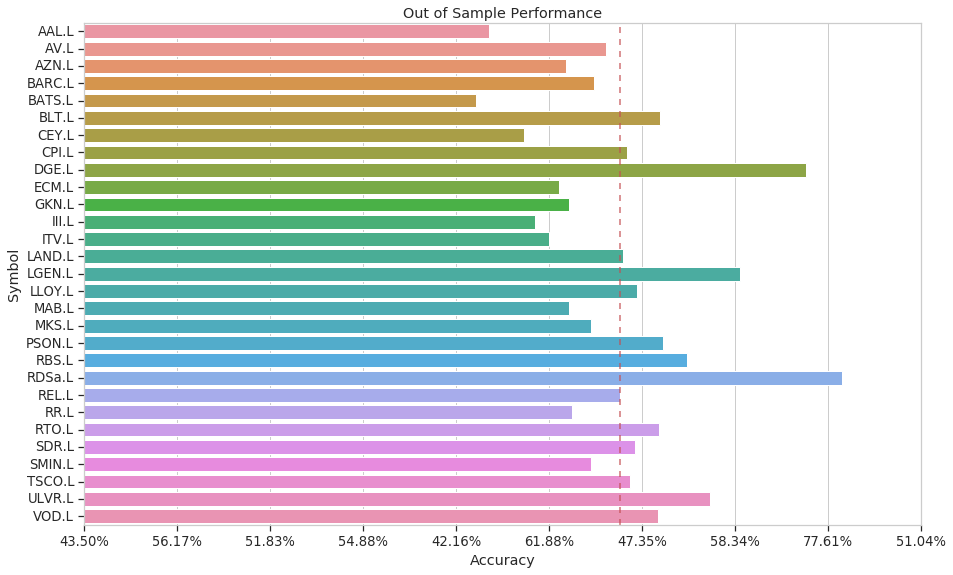

In [30]:
papercode_dir= '/home/ak/Documents/Research/Papers/figures/'
plt.figure(figsize=(15,9))
sns.light_palette("navy", reverse=True)
#sns.set_palette("husl")
sns.color_palette("PuBuGn_d")
sns.set_context("talk")
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.title('Out of Sample Performance')
ax = sns.barplot(y='Symbol', x='Accuracy',data=df_means)
ax.tick_params(right=False, top=False)
line_level = float(df_means.mean())
plt.axvline(line_level, color= 'r', alpha=0.8, linestyle='dashed',linewidth=1.5)
# manipulate
ax.set_xticklabels(['{:,.02%}'.format(x) for x in df_means['Accuracy']])
# ["{0:.2f}%".format(val * 100) for val in df_means['Accuracy']]
filename='oos_performance.png'
plt.savefig("".join((papercode_dir,filename)))
plt.show()

In [ ]:
df_means.plot.bar()
plt.title('Out of sample Accuracy')
plt.xlabel('symbol')
sns.set_palette("husl")
